In [1]:
import os
import json
import pandas as pd

###  path to the 'india' directory

In [2]:
india_data_path = r'C:\Users\KIIT\Documents\13_File\india'

###  Function to process JSON data from a given file path

In [3]:
def process_json_file(json_path):
    with open(json_path, 'r') as f:
        json_data = json.load(f)
        return json_data

### Lists to store data

In [4]:
data_list = []

### Traverse through directories

In [5]:
for root, dirs, files in os.walk(india_data_path):
    for file in files:
        if file.endswith('.json'):
            json_path = os.path.join(root, file)
            json_data = process_json_file(json_path)
            data_list.append(json_data['data']['transactionData'])

### Extract relevant information and create a DataFrame

In [6]:
data_records = []
for transaction_data in data_list:
    for category_data in transaction_data:
        category_name = category_data['name']
        payment_instruments = category_data['paymentInstruments']

        for instrument in payment_instruments:
            instrument_type = instrument['type']
            count = instrument['count']
            amount = instrument['amount']

            data_records.append({
                'Category': category_name,
                'Instrument Type': instrument_type,
                'Count': count,
                'Amount': amount
            })

### Create a DataFrame

In [7]:
df = pd.DataFrame(data_records)

### Display the DataFrame

In [8]:
print(df)

                      Category Instrument Type      Count        Amount
0     Recharge & bill payments           TOTAL   72550406  1.447271e+10
1        Peer-to-peer payments           TOTAL   46982705  1.472459e+11
2            Merchant payments           TOTAL    5368669  4.656679e+09
3           Financial Services           TOTAL    3762820  8.158531e+08
4                       Others           TOTAL    5761576  4.643217e+09
...                        ...             ...        ...           ...
3134     Peer-to-peer payments           TOTAL  124787028  4.463437e+11
3135         Merchant payments           TOTAL   97315025  8.585473e+10
3136  Recharge & bill payments           TOTAL   37317865  1.843542e+10
3137        Financial Services           TOTAL     239530  2.610966e+08
3138                    Others           TOTAL     845644  5.316713e+08

[3139 rows x 4 columns]


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3139 entries, 0 to 3138
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         3139 non-null   object 
 1   Instrument Type  3139 non-null   object 
 2   Count            3139 non-null   int64  
 3   Amount           3139 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 98.2+ KB


### Explore unique categories and instrument types

In [10]:
unique_categories = df['Category'].unique()
unique_instrument_types = df['Instrument Type'].unique()

In [11]:
df.describe()

,Count,Amount
count,3.139000e+03,3.139000e+03
mean,2.549581e+07,4.484193e+10
std,1.548667e+08,3.587787e+11
min,2.000000e+00,3.439721e+01
25%,3.979650e+04,2.478298e+07
50%,3.474940e+05,2.719435e+08
75%,5.771628e+06,4.904488e+09
max,3.748851e+09,1.050594e+13


### Check for missing values

In [12]:
df.isnull().sum() / df.shape[0] * 100

Category           0.0
Instrument Type    0.0
Count              0.0
Amount             0.0
dtype: float64

In [13]:
missing_values = df.isnull().sum()

In [14]:
df.nunique()

Category              5
Instrument Type       1
Count              3101
Amount             3139
dtype: int64

### Print summary of data exploration and cleaning

In [15]:
print("Unique Categories:", unique_categories)
print("Unique Instrument Types:", unique_instrument_types)
print("Missing Values:\n", missing_values)

Unique Categories: ['Recharge & bill payments' 'Peer-to-peer payments' 'Merchant payments'
 'Financial Services' 'Others']
Unique Instrument Types: ['TOTAL']
Missing Values:
 Category           0
Instrument Type    0
Count              0
Amount             0
dtype: int64


In [16]:
df.head()

,Category,Instrument Type,Count,Amount
0,Recharge & bill payments,TOTAL,72550406,1.447271e+10
1,Peer-to-peer payments,TOTAL,46982705,1.472459e+11
2,Merchant payments,TOTAL,5368669,4.656679e+09
3,Financial Services,TOTAL,3762820,8.158531e+08
4,Others,TOTAL,5761576,4.643217e+09


In [17]:
instrument_type_counts = df['Instrument Type'].value_counts()
print(instrument_type_counts)

TOTAL    3139
Name: Instrument Type, dtype: int64


In [18]:
df.drop(['Instrument Type'], axis=1, inplace=True)

In [19]:
print(df)

                      Category      Count        Amount
0     Recharge & bill payments   72550406  1.447271e+10
1        Peer-to-peer payments   46982705  1.472459e+11
2            Merchant payments    5368669  4.656679e+09
3           Financial Services    3762820  8.158531e+08
4                       Others    5761576  4.643217e+09
...                        ...        ...           ...
3134     Peer-to-peer payments  124787028  4.463437e+11
3135         Merchant payments   97315025  8.585473e+10
3136  Recharge & bill payments   37317865  1.843542e+10
3137        Financial Services     239530  2.610966e+08
3138                    Others     845644  5.316713e+08

[3139 rows x 3 columns]


## Data Visualization:

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
pastel_palette = sns.color_palette("pastel")

### Plot count of transactions by category using a bar plot

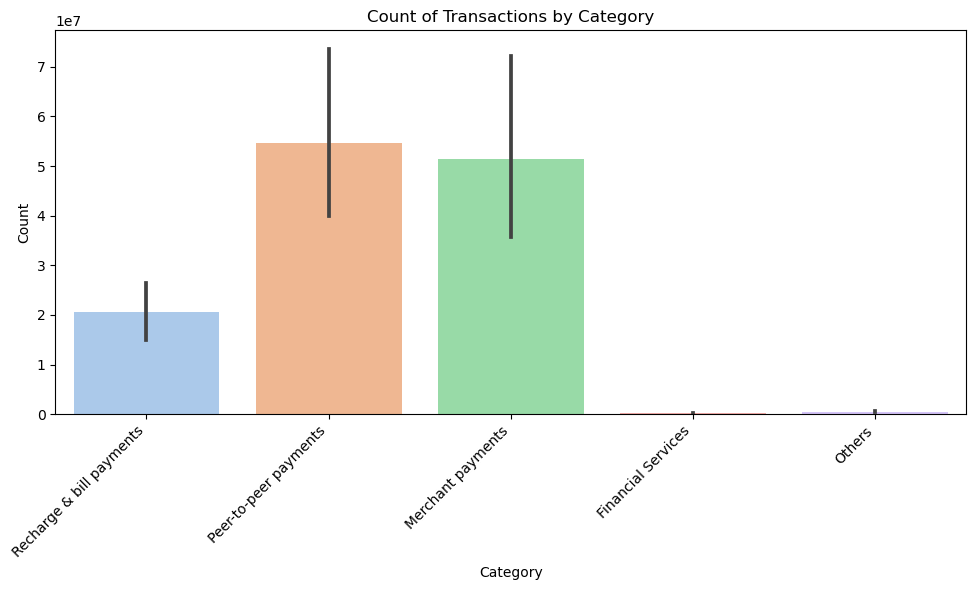

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Count', data=df, palette=pastel_palette)
plt.xticks(rotation=45, ha='right')
plt.title("Count of Transactions by Category")
plt.tight_layout()
plt.show()

## Building the Dashboard:

In [23]:
!pip install dash

In [24]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

C:\Users\KIIT\AppData\Local\Temp\ipykernel_39468\251688514.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\KIIT\AppData\Local\Temp\ipykernel_39468\251688514.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


### Initialize the Dash app

In [25]:
app = dash.Dash(__name__)

### Define the app layout

In [26]:
app = dash.Dash(__name__, suppress_callback_exceptions=True)

In [27]:
app.layout = html.Div([
    html.H1("PhonePe Transactions Dashboard"),
    dcc.Tabs(id='tabs', value='tab-1', children=[
        dcc.Tab(label='Transactions by Category', value='tab-1'),
        dcc.Tab(label='Transaction Amounts', value='tab-2'),
        dcc.Tab(label='Summary', value='tab-3')
    ]),
    html.Div(id='tab-content'),
    dcc.Dropdown(
        id='dropdown-category',
        options=[{'label': category, 'value': category} for category in df['Category'].unique()],
        value=df['Category'].unique()[0],  # Set initial value
    ),
])

### Define callback for changing tabs and displaying content

In [28]:
@app.callback(
    Output('tab-content', 'children'),
    Input('tabs', 'value')
)
def render_content(tab):
    if tab == 'tab-1':
        return dcc.Graph(id='transaction-graph',
                         config={'displayModeBar': False})
    elif tab == 'tab-2':
        return dcc.Graph(id='transaction-amounts',
                         config={'displayModeBar': False})
    elif tab == 'tab-3':
        summary_df = df.groupby('Category').agg({'Count': 'sum'}).reset_index()
        return dcc.Graph(id='summary-chart',
                         config={'displayModeBar': False},
                         figure=px.bar(summary_df, x='Category', y='Count',
                                       title="Summary of Transaction Counts by Category"))


### Define callback for updating the first graph based on user input

In [29]:
@app.callback(
    Output('transaction-graph', 'figure'),
    Input('dropdown-category', 'value')
)
def update_graph(selected_category):
    filtered_df = df[df['Category'] == selected_category]
    fig = px.bar(filtered_df, x='Category', y='Count',
                 title=f"Count of Transactions by Category ({selected_category})")
    return fig

### Define callback for updating the second graph based on user input

In [30]:
@app.callback(
    Output('transaction-amounts', 'figure'),
    Input('dropdown-category', 'value')
)
def update_amounts(selected_category):
    filtered_df = df[df['Category'] == selected_category]
    fig = px.bar(filtered_df, x='Category', y='Amount',
                 title=f"Transaction Amounts by Category ({selected_category})")
    return fig

### Run the app

In [31]:
if __name__ == '__main__':
    app.run_server(debug=True)